## **Data Cleaning and Overview**

---





*   Import libraries
*   Clean the dataframe



In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv')

In [ ]:
# Check the dataset loaded correctly
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
# Check the shape
df.shape

(398, 8)

In [ ]:
# Check for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

No null variables in any columns, so no need to drop any rows.

## **Principal Component Analysis**



*   Scale the data
*   Determine how many PCA coefficients to use
*   Create a chart of the PCA analysis


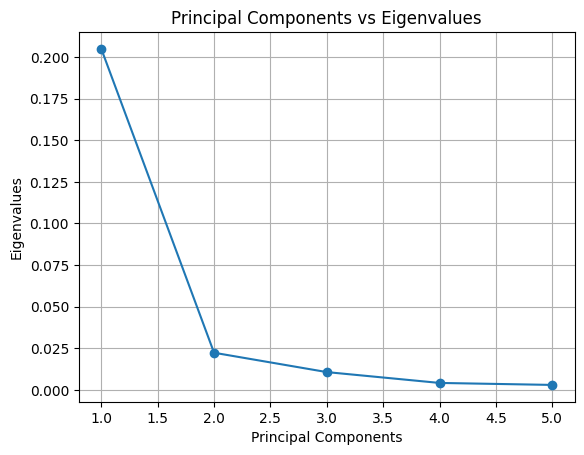

In [ ]:
# Create a scaler variable for all conversions
scaler = MinMaxScaler()

# All variables will be converted to min-max scaler
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Process the numeric columns with the scaler
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Calculate the covariance matrix
cov_matrix = np.cov(df[numeric_columns].values.T)

# Calculate eigenvalues
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Plotting the eigenvalues
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Principal Components vs Eigenvalues')
plt.grid(True)
plt.show()




In [ ]:
# Find the top 3 PCA coefficients
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(df[numeric_columns])
top_3_pca_coefficients = pca.components_

# Print the top 3 PCA coefficients
original_column_names = df.columns.tolist()
top_3_pca_column_names = [f'Top PCA {i+1}' for i in range(3)]
for i, column_name in enumerate(top_3_pca_column_names):
    print(f"{column_name}: {original_column_names[np.argmax(np.abs(top_3_pca_coefficients[i]))]}")

Top PCA 1: cylinders
Top PCA 2: weight
Top PCA 3: mpg


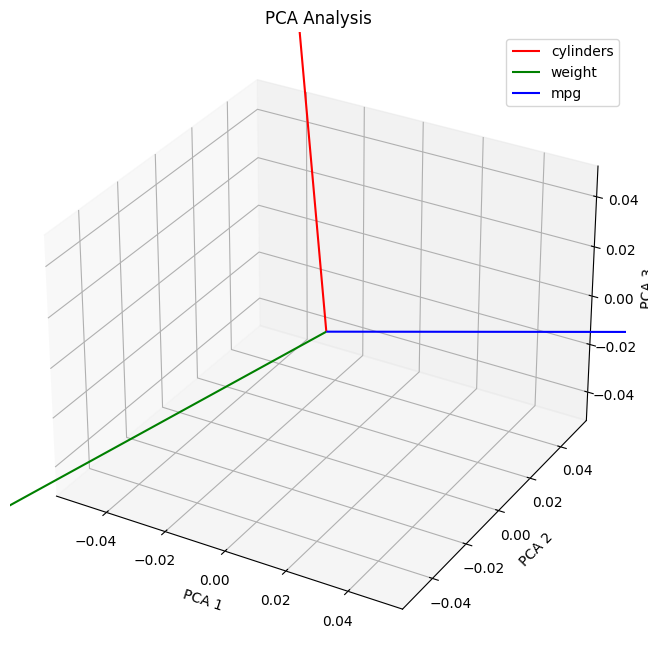

In [ ]:
# Plot the top 3 principle components on a 3D graph

# Assign the PCA coefficients to a variable
top_3_pca_coefficients = pca.components_

# Assign column names and line colors
column_names = ['cylinders', 'weight', 'mpg']
line_colors = ['red', 'green', 'blue']

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the coefficients as vectors
for i in range(3):
    ax.quiver(0, 0, 0, top_3_pca_coefficients[i, 0], top_3_pca_coefficients[i, 1], top_3_pca_coefficients[i, 2],
              label=column_names[i], color=line_colors[i])

# Plot legend
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()

# Show the plot
plt.title('PCA Analysis')
plt.show()

## Results

*   PCA 1 groups vehicles based on a slightly negative trend in weight and cylinder count together. These vehicles also have slightly higher fuel efficiency.
*    PCA 2 generally groups vehicles based on a postive cylinder count trend and negative weight trend, which results in considerably higher MPG.
*   PCA 3 groups vehicles based on a sharp upward trend in cylinder count and a slightly negative trend in weight and MPG.






## **t-SNE**



*   Examine the relationship between scaled variables
*   2D and 3D charts



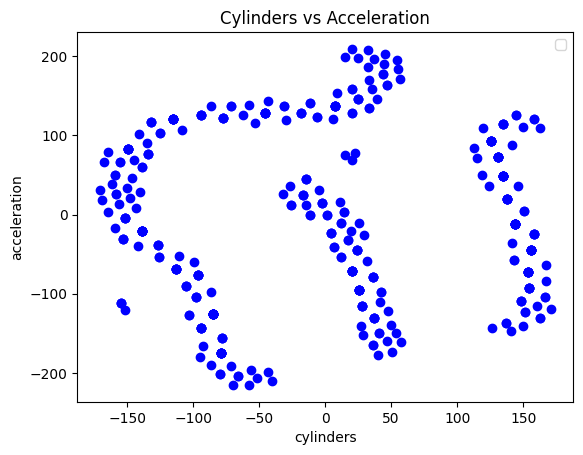

In [ ]:
#Plot a TSNE graph of cylinders vs acceleration

# Select the two variables for t-SNE visualization
column_names = ['cylinders', 'acceleration']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Cylinders vs Acceleration')

# Show the plot
plt.legend()
plt.show()


Cars with fewer cylinders have the most variance in acceleration. And both other large clusters also have a considerable amount of variance. So cylinder count doesn't seem to be critical for quick acceleration.

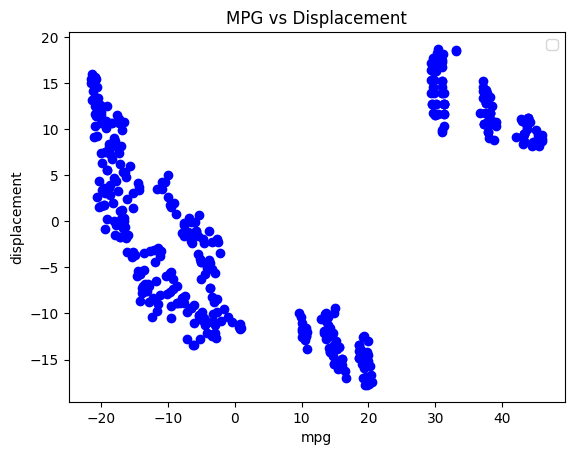

In [ ]:
# Plot a TSNE graph of MPG vs displacement

# Select the two variables for t-SNE visualization
column_names = ['mpg', 'displacement']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('MPG vs Displacement')

# Show the plot
plt.legend()
plt.show()

The largest engines get the best MPG and the smallest engines get slightly above average MPG. Engines with the worst MPG vary greatly in size.

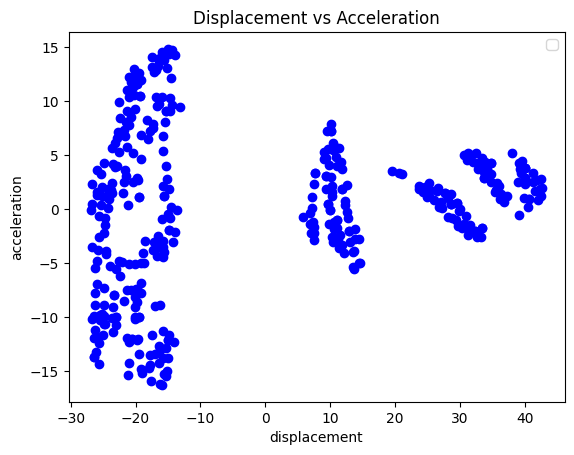

In [ ]:
#Plot a TSNE graph of displacement vs acceleration

# Select the two variables for t-SNE visualization
column_names = ['displacement', 'acceleration']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Displacement vs Acceleration')

# Show the plot
plt.legend()
plt.show()


Small and medium sized engines get average acceleration while the smallest engines can have the highest or lowest acceleration rates of the dataset. Other factors must influence larger engines' tendency to get average acceleration.

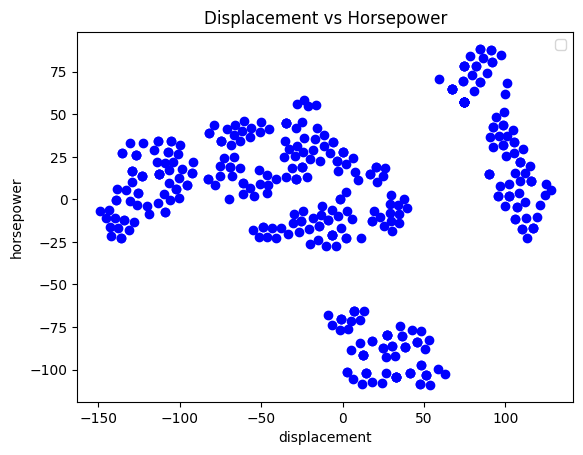

In [ ]:
#Plot a TSNE graph of displacement vs horsepower

# Select the two variables for t-SNE visualization
column_names = ['displacement', 'horsepower']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a scatter plot of the t-SNE results
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='b', marker='o')

# Plot legend
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Displacement vs Horsepower')

# Show the plot
plt.legend()
plt.show()


The largest engines generally have the highest horsepower, and there are several average sized engines with low horsepower. Most small and average sized engines have average horsepower.

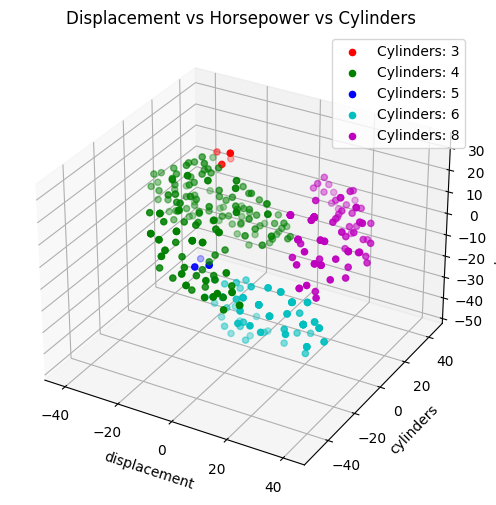

In [ ]:
#Plot a TSNE graph of displacement vs cylinders vs horsepower

# Select the three variables for t-SNE visualization
column_names = ['displacement', 'cylinders', 'horsepower']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to the points based on a categorical variable
cylinders = df['cylinders'].values
unique_cylinders = sorted(df['cylinders'].unique())
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'][:len(unique_cylinders)]

# Scatterplot with the three dimensions
for i, cylinder in enumerate(unique_cylinders):
    indices = (cylinders == cylinder)
    ax.scatter(tsne_result[indices, 0], tsne_result[indices, 1], tsne_result[indices, 2], c=colors[i], marker='o', label=f'Cylinders: {cylinder}')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('Displacement vs Horsepower vs Cylinders')
plt.legend()

# Show the plot
plt.show()



We can see the relationships more clearly by plotting some of the same variables from the 2D analysis on a 3D plane. Four-cylinder engines have the largest amount of variance in size and horsepower, six-cylinder engines have low horsepower, and eight-cylinder engines are the largest and have the highest horsepower.

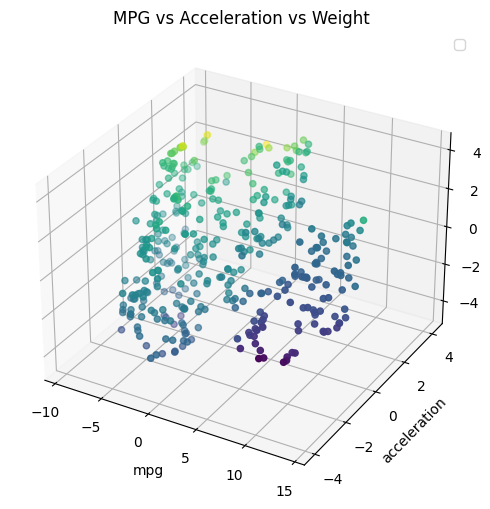

In [ ]:
#Plot a TSNE graph of MPG vs Acceleration vs Weight

# Select the three variables for t-SNE visualization
column_names = ['mpg', 'acceleration', 'weight']
data = df[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create color shading for acceleration
acceleration_values = df['acceleration'].values
acceleration_min = acceleration_values.min()
acceleration_max = acceleration_values.max()
acceleration_norm = (acceleration_values - acceleration_min) / (acceleration_max - acceleration_min)  # Normalize acceleration values between 0 and 1
colors = plt.cm.viridis(acceleration_norm)  # Use a colormap (viridis) to map normalized acceleration values to colors

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=colors, marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('MPG vs Acceleration vs Weight')

# Show the plot
plt.legend()
plt.show()


There's more variance in the weight of low MPG vehicles, and high MPG cars are typically lighter. Vehicles with high fuel efficiency typically have lower acceleration, but all in all there's a lot of variance in acceleration regardless of weight or MPG.

Since you can group the vehicles into 3 groups based on model year, let's redo our 3D t-SNE analysis for each group.

## 3D t-SNE Grouped by Years

In [ ]:
# Segment our dataframe

# Convert the "model year" column to integer
df['model year'] = df['model year'].astype(int)

# Segment the DataFrame
group_70_74 = df[(df['model year'] >= 70) & (df['model year'] <= 74)]
group_75_79 = df[(df['model year'] >= 75) & (df['model year'] <= 79)]
group_80_82 = df[(df['model year'] >= 80) & (df['model year'] <= 82)]

# Print the lengths of the segmented groups
print("Number of records in the group 70-74:", len(group_70_74))
print("Number of records in the group 75-79:", len(group_75_79))
print("Number of records in the group 80-82:", len(group_80_82))


Number of records in the group 70-74: 150
Number of records in the group 75-79: 157
Number of records in the group 80-82: 85


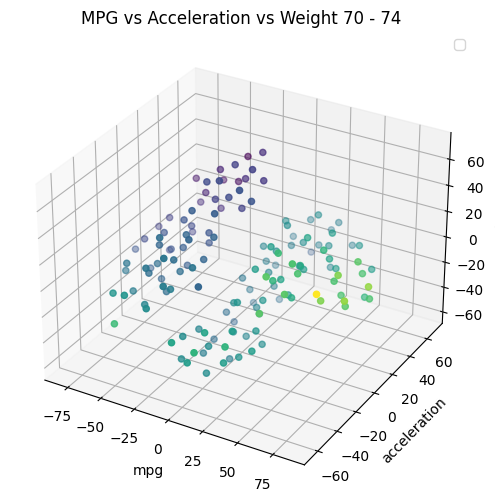

In [ ]:
#Plot a TSNE graph of MPG vs Acceleration vs Weight for '70-'74

# Select the three variables for t-SNE visualization
column_names = ['mpg', 'acceleration', 'weight']
data = group_70_74[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create color shading for acceleration
acceleration_values = group_70_74['acceleration'].values
acceleration_min = acceleration_values.min()
acceleration_max = acceleration_values.max()
acceleration_norm = (acceleration_values - acceleration_min) / (acceleration_max - acceleration_min)  # Normalize acceleration values between 0 and 1
colors = plt.cm.viridis(acceleration_norm)  # Use a colormap (viridis) to map normalized acceleration values to colors

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=colors, marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('MPG vs Acceleration vs Weight 70 - 74')

# Show the plot
plt.legend()
plt.show()

Vehicles from '70 to '74 almost exclusively get low or average MPG. There's no trend in acceleration that I can see from this analysis, though. And Most vehicles are average/lightweight.

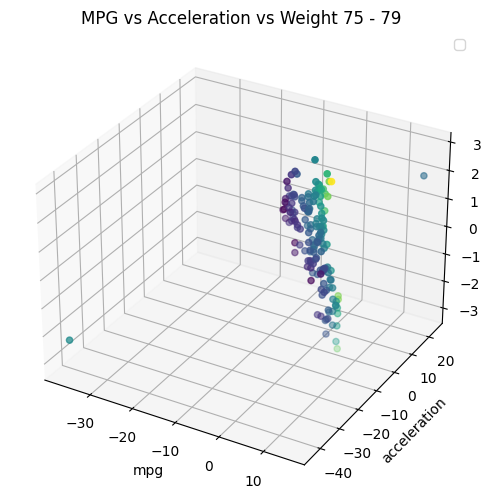

In [ ]:
#Plot a TSNE graph of MPG vs Acceleration vs Weight for '75-'79

# Select the three variables for t-SNE visualization
column_names = ['mpg', 'acceleration', 'weight']
data = group_75_79[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create color shading for acceleration
acceleration_values = group_75_79['acceleration'].values
acceleration_min = acceleration_values.min()
acceleration_max = acceleration_values.max()
acceleration_norm = (acceleration_values - acceleration_min) / (acceleration_max - acceleration_min)  # Normalize acceleration values between 0 and 1
colors = plt.cm.viridis(acceleration_norm)  # Use a colormap (viridis) to map normalized acceleration values to colors

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=colors, marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('MPG vs Acceleration vs Weight 75 - 79')

# Show the plot
plt.legend()
plt.show()

Vehicles from '75 to '79 all have the highest MPG in the dataset and completely average acceleration. Weight varies widely but most are heavy. There isn't enough information in this dataset to figure out why these vehicles have such little variety. If the data was there, this would be something to investigate further.

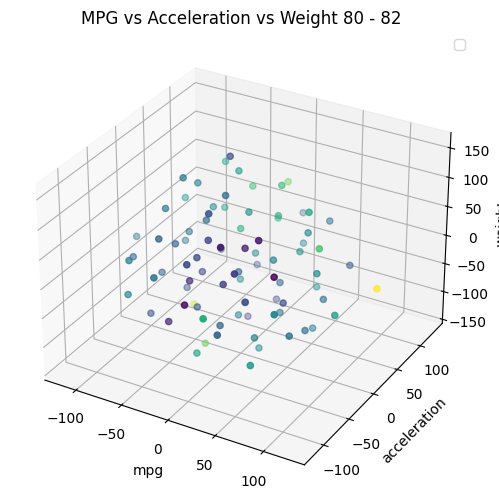

In [ ]:
#Plot a TSNE graph of MPG vs Acceleration vs Weight for '80-'82

# Select the three variables for t-SNE visualization
column_names = ['mpg', 'acceleration', 'weight']
data = group_80_82[column_names].values

# Apply t-SNE to the selected columns
tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a 3D scatter plot of the t-SNE results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create color shading for acceleration
acceleration_values = group_80_82['acceleration'].values
acceleration_min = acceleration_values.min()
acceleration_max = acceleration_values.max()
acceleration_norm = (acceleration_values - acceleration_min) / (acceleration_max - acceleration_min)  # Normalize acceleration values between 0 and 1
colors = plt.cm.viridis(acceleration_norm)  # Use a colormap (viridis) to map normalized acceleration values to colors

# Scatterplot with the three dimensions
ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=colors, marker='o')

# Plot legend
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])
plt.title('MPG vs Acceleration vs Weight 80 - 82')

# Show the plot
plt.legend()
plt.show()

There don't seem to be any trends in the vehicles made between '80 and '82. Those with higher MPG tend to be slightly lighter but overall the data is all over the place.

## Heatmaps

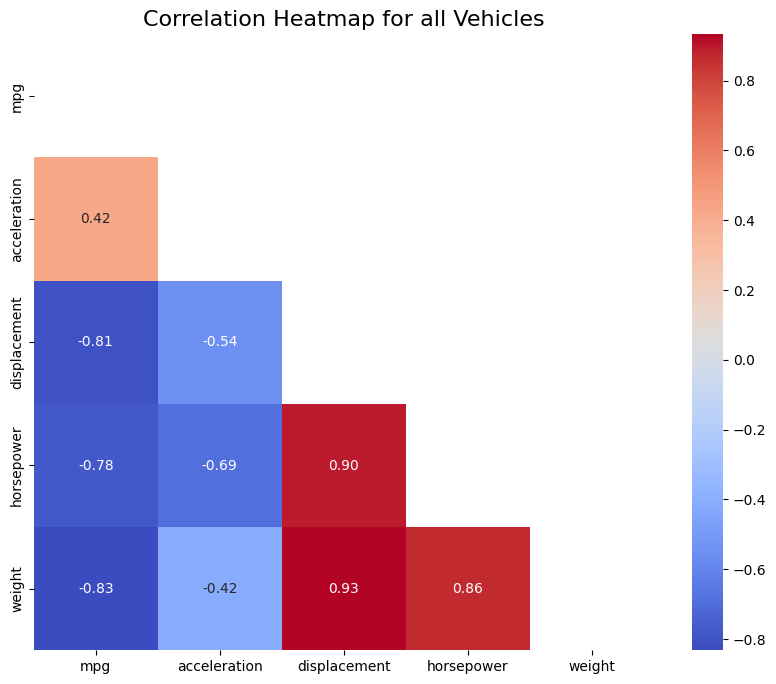

In [ ]:
# All vehicles

# Filter rows
subset_df = df[['mpg', 'acceleration', 'displacement', 'horsepower', 'weight']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=np.triu(np.ones_like(subset_df.corr(), dtype=bool)))
plt.title('Correlation Heatmap for all Vehicles', fontsize=16)
plt.show()

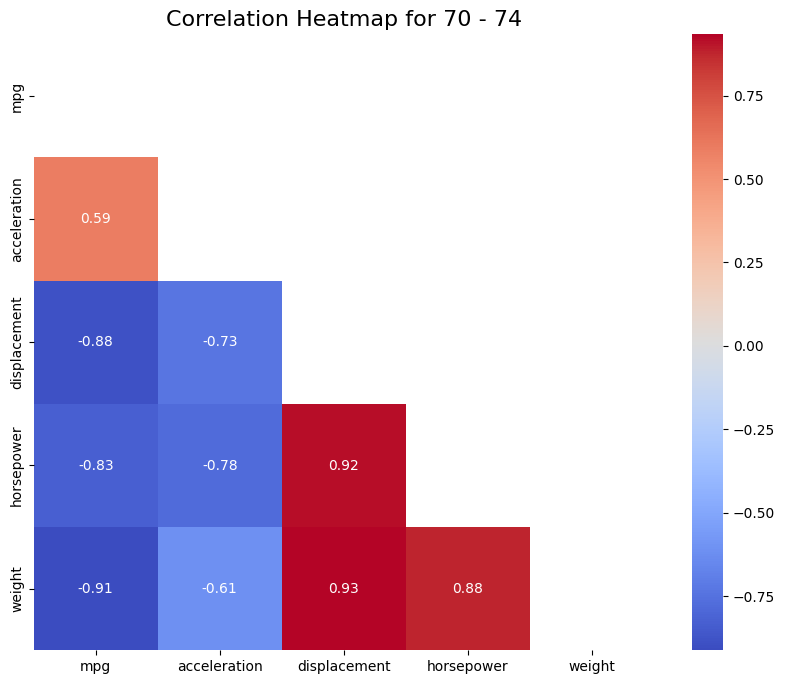

In [ ]:
# '70 - '74

# Filter rows
subset2_df = group_70_74[['mpg', 'acceleration', 'displacement', 'horsepower', 'weight']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset2_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=np.triu(np.ones_like(subset2_df.corr(), dtype=bool)))
plt.title('Correlation Heatmap for 70 - 74', fontsize=16)
plt.show()

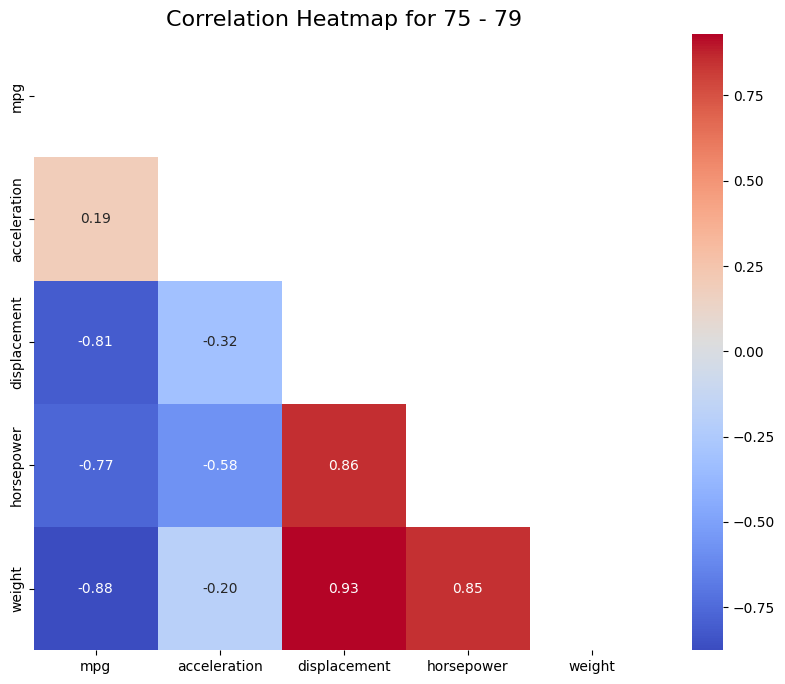

In [ ]:
# '75 - '79

# Filter rows
subset3_df = group_75_79[['mpg', 'acceleration', 'displacement', 'horsepower', 'weight']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset3_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=np.triu(np.ones_like(subset3_df.corr(), dtype=bool)))
plt.title('Correlation Heatmap for 75 - 79', fontsize=16)
plt.show()




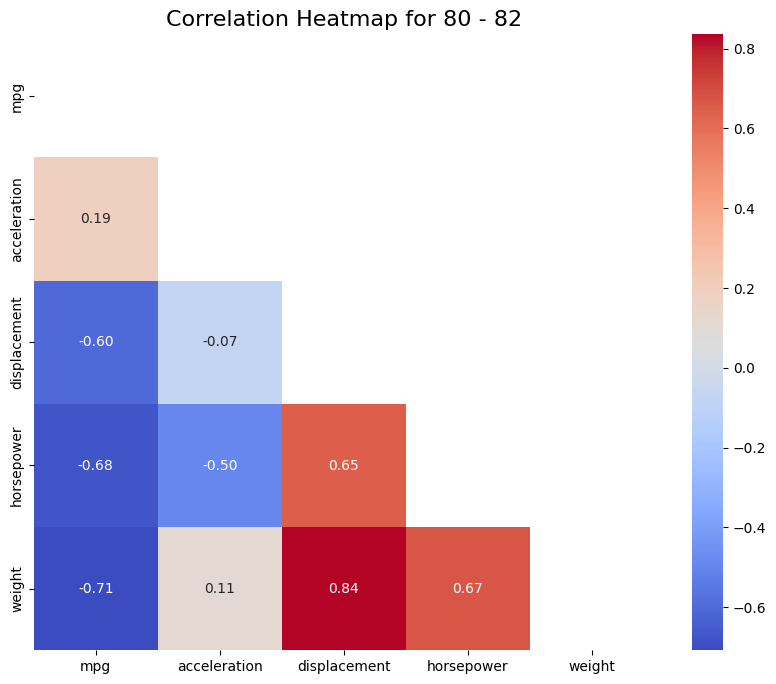

In [ ]:
# '80 - '82

# Filter rows
subset4_df = group_80_82[['mpg', 'acceleration', 'displacement', 'horsepower', 'weight']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset4_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, mask=np.triu(np.ones_like(subset4_df.corr(), dtype=bool)))
plt.title('Correlation Heatmap for 80 - 82', fontsize=16)
plt.show()

The effects of weight, horsepower, and displacement on MPG slowly decrease as you move into newer model vehicles. And there's actually a positive correlation between acceleration and weight for cars made between 80-82.

#### **Data Analysis of the Top 5 Most Common Manufacturers**

*   IQR charts of variable distribution

In [ ]:
# Create a list of the 5 most common car manufacturers

# Calculate the frequency of each value in the 'manufacturer' column
value_counts = df['manufacturer'].value_counts()

# Get the 5 most frequent values (manufacturers)
top_5_manufacturers = value_counts.head(5).index.tolist()

# Print list
print(f'The 5 most common car manufacturers are: {top_5_manufacturers}')

The 5 most common car manufacturers are: ['ford', 'chevrolet', 'plymouth', 'dodge', 'amc']


In [ ]:
# Print the value counts of the top 5 manufacturers
for manufacturer in top_5_manufacturers:
    count = df['manufacturer'].value_counts()[manufacturer]
    print(f'{manufacturer}: {count}')

ford: 48
chevrolet: 47
plymouth: 31
dodge: 28
amc: 27


One noteworthy point that isn't in the data- Chrysler, who has 6 cars in the dataframe, owned Plymouth and Dodge. Chrysler produced a range of vehicles under the Dodge brandname, and Plymouth was Chrysler's low-pricepoint line. I'm assuming there are fewer Chrysler brand vehicles in the dataset because of the higher pricepoint.

In [ ]:
# Make a copy of the original dataframe and filter it to only include the 5 most common manufacturers
filtered_df = df[df['manufacturer'].isin(top_5_manufacturers)]

In [ ]:
#Check the new dataframe
filtered_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,manufacturer
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,chevrolet chevelle malibu,chevrolet
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,plymouth satellite,plymouth
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,amc rebel sst,amc
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,ford torino,ford
5,0.159574,8,0.932817,0.826087,0.773462,0.119048,70,ford galaxie 500,ford


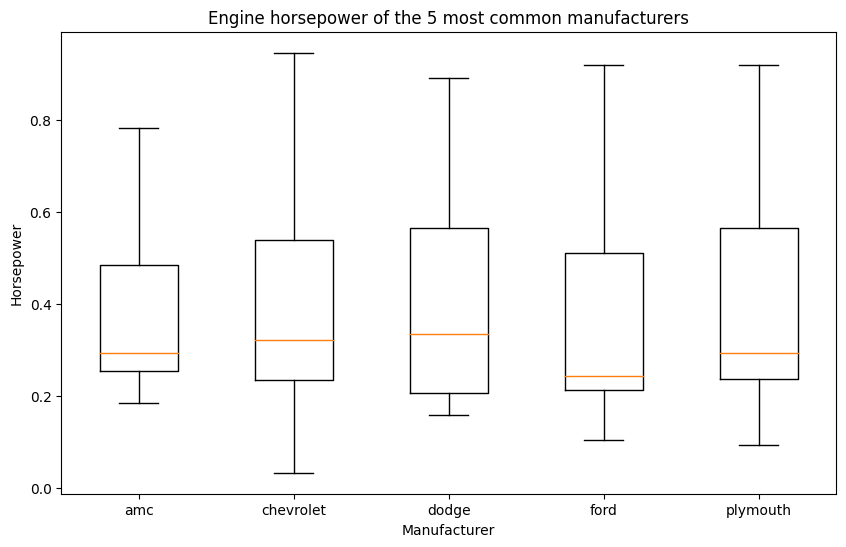

In [ ]:
#Plot a boxplot measuring horsepower by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Convert 'horsepower' column to numeric, coerce errors to NaN
filtered_df['horsepower'] = pd.to_numeric(filtered_df['horsepower'], errors='coerce')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['horsepower'].dropna().values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Horsepower')
plt.title('Engine horsepower of the 5 most common manufacturers')

# Show the plot
plt.show()


Horsepower is similar among the most common brands. AMC has slightly lower horsepower than the rest, though.

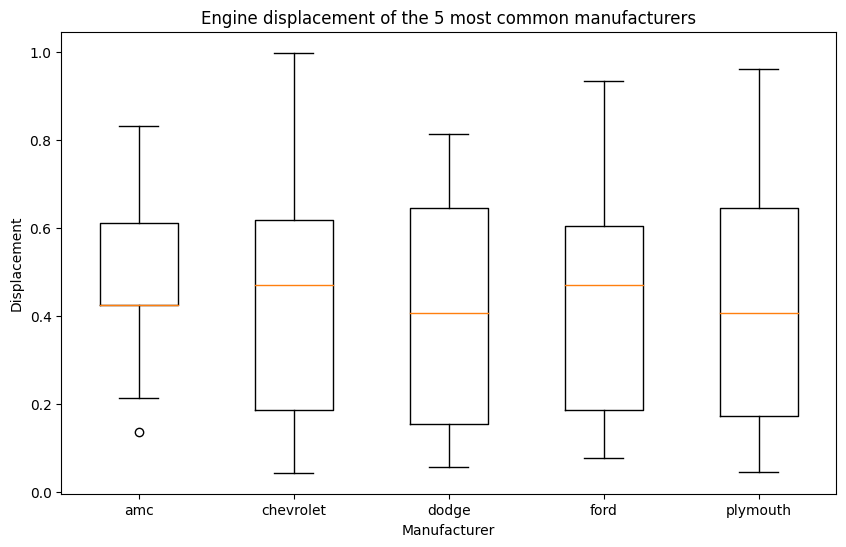

In [ ]:
# Plot a boxplot measuring displacement by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['displacement'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.title('Engine displacement of the 5 most common manufacturers')

# Show the plot
plt.show()


Engine size varies widely with all manufactures, but the averages are all pretty close.

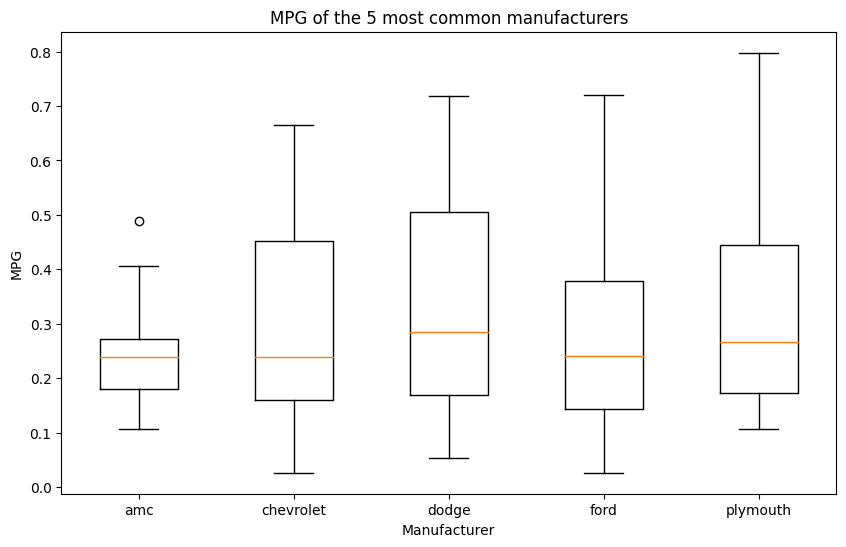

In [ ]:
# Plot a boxplot measuring mpg by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['mpg'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('MPG')
plt.title('MPG of the 5 most common manufacturers')

# Show the plot
plt.show()


Again, pretty similar results. AMC vehicles have little variance compared to the rest of the companies, though.

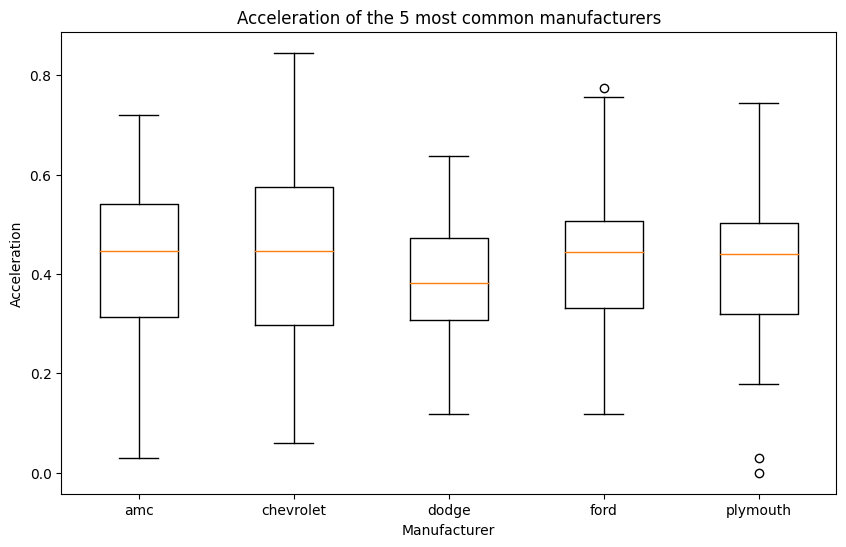

In [ ]:
# Plot a boxplot measuring acceleration by manufacturer

# Sort the data by the categorical column
sorted_manufacturer = filtered_df.sort_values(by='manufacturer')

# Create a box plot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([group['acceleration'].values for _, group in sorted_manufacturer.groupby('manufacturer')],
            labels=sorted_manufacturer['manufacturer'].unique())

# Plot legend
plt.xlabel('Manufacturer')
plt.ylabel('Acceleration')
plt.title('Acceleration of the 5 most common manufacturers')

# Show the plot
plt.show()

Again, little variance between the companies. Dodge has the least variance of all 5.